In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [4]:
metros = pd.read_excel('riyadh_metro_stations_Full.xlsx')

# Show first 5 rows
metros.head()

FileNotFoundError: [Errno 2] No such file or directory: 'riyadh_metro_stations_Full.xlsx'

#EDA

In [8]:
# Show the shape of dataset - # of columns and rows
print('Number of columns and rows: \n')
print(metros.shape)

Number of columns and rows: 

(296, 6)


In [9]:
print('Info about the dataset elements: \n')
print(metros.info())

Info about the dataset elements: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               296 non-null    object 
 1   Type_of_Utility    296 non-null    object 
 2   Number_of_Ratings  256 non-null    float64
 3   Rating             256 non-null    float64
 4   Longitude          296 non-null    float64
 5   Latitude           296 non-null    float64
dtypes: float64(4), object(2)
memory usage: 14.0+ KB
None


In [10]:
print('Description of the dataset: \n')
print(metros['Rating'].describe())

Description of the dataset: 

count    256.000000
mean       3.722656
std        1.753147
min        0.000000
25%        3.500000
50%        4.400000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64


In [11]:
print('Null values: \n')
print(metros.isnull().sum())

Null values: 

Name                  0
Type_of_Utility       0
Number_of_Ratings    40
Rating               40
Longitude             0
Latitude              0
dtype: int64


In [12]:
print('Duplicate values: \n')
print(metros.duplicated().sum())

Duplicate values: 

0


## Visualization


In [13]:
# show the distribtuon of rating


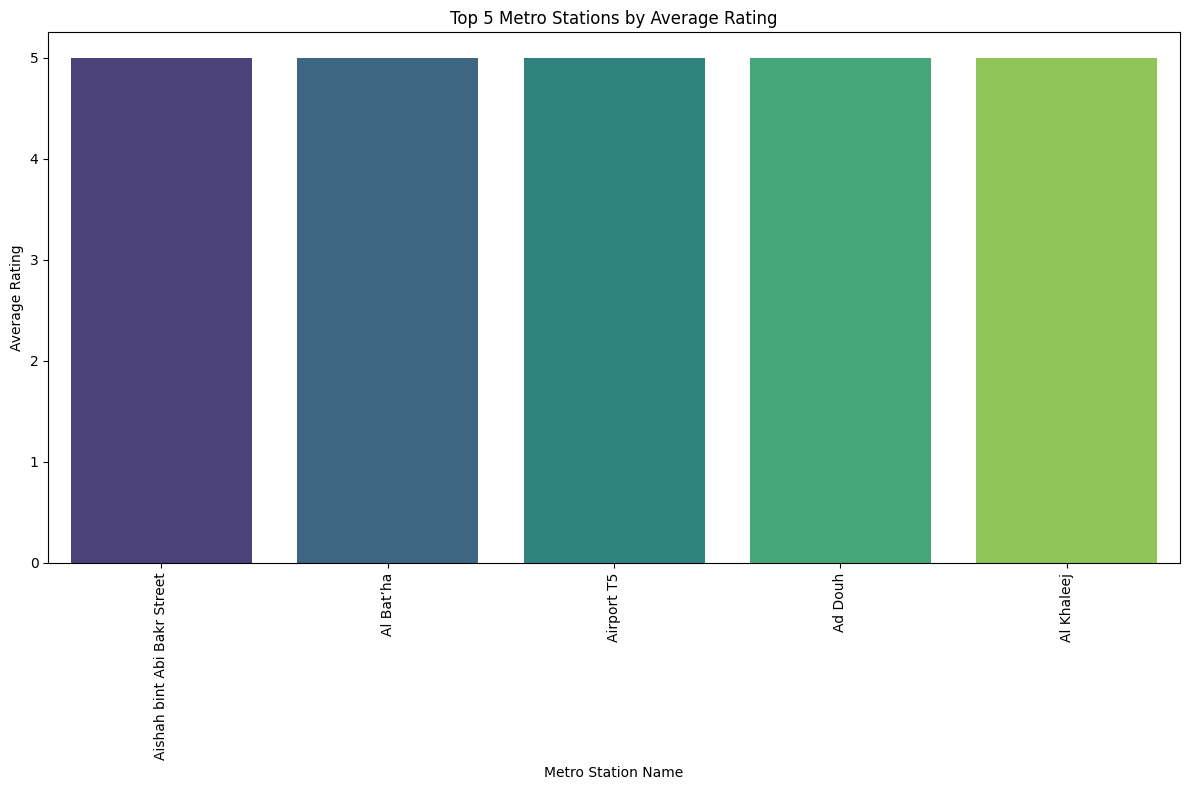

In [15]:
# Group by 'Name' and calculate the average rating
average_ratings = metros.groupby('Name')['Rating'].mean().sort_values(ascending=False)

# Take the top 5 stations
top_5_stations = average_ratings.head(5)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_stations.index, y=top_5_stations.values, palette='viridis')
plt.title('Top 5 Metro Stations by Average Rating')
plt.xlabel('Metro Station Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
# show the exact location
metro = folium.Map(
    location=(24.559996, 46.776301),
    control_scale=True,
    zoom_start=15
)
metro

# show marker on the map

folium.Marker(
location=[24.559996, 46.776301],
).add_to(metro)


folium.Marker(
    location=[24.559996, 46.000000],
    popup='Riyadh Metro Station',
    icon=folium.Icon(color='white')
).add_to(metro)

metro
